# Support Vector Machine

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets
%matplotlib inline

### Get the Data

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]     #take only first two features
Y = iris.target
# Plot resulting Support Vector boundaries with original data
# Create fake input data for prediction that we will use for plotting
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]  # Translates slice objects to concatenation along the second axis.
#print(xx.ravel())
#print(yy.ravel())
#print(X_plot)

### SVM Modelling and Prediction for Linear Kernel

In [3]:
# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

**Classified Plots**

Text(0.5, 1.0, 'SVC with linear kernel')

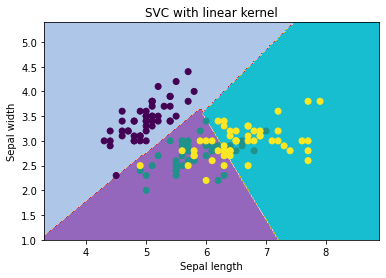

In [4]:
#plt.figure(figsize=(15, 5))
#plt.subplot(121)
plt.contourf( xx,yy,Z, cmap=plt.cm.tab20)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

### SVM Modelling and Prediction for Radial Kernel

In [5]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, Y)

In [6]:
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

**Classified Plots**

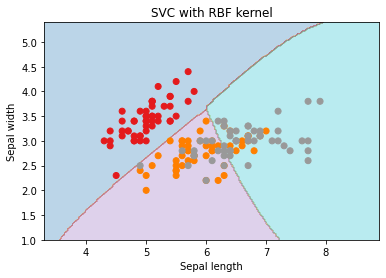

In [7]:
#plt.subplot(122)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.show()